## pyDESeq2

https://pydeseq2.readthedocs.io/en/latest/auto_examples/plot_step_by_step.html

In [43]:
import pandas as pd

In [2]:
import anndata as ad

In [1]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

### Data loading
> Note that we are also explaining this step in the ‘getting started’ example. To perform differential expression analysis (DEA), PyDESeq2 requires two types of inputs:

> A count matrix of shape ‘number of samples’ x ‘number of genes’, containing read counts (non-negative integers),

> Clinical data (or “column” data) of shape ‘number of samples’ x ‘number of variables’, containing sample annotations that will be used to split the data in cohorts.

In [1]:
target_df = adata.var.sort_values(by=['target','targetType'],ascending=True)[['target']]

NameError: name 'adata' is not defined

In [ ]:
adata = ad.read_h5ad('results/adata_counts.h5ad.gz')
adata.obs['condition'] = adata.obs.treatment.replace('-','T0')
adata.obs = adata.obs[['cell line','condition','rep']]
adata.obs.index.name = None

In [ ]:
adata_parent = adata[adata.obs['cell line'].eq('parent')].copy()

dds = DeseqDataSet(
    adata = adata_parent,
    design_factors='condition', # ['treatment','timepoint'],
    ref_level=['condition','T0'],
    refit_cooks=True,
    # min_replicates = 2,
    n_cpus=8,
)

In [ ]:
dds.varm['LFC'].columns

In [ ]:
dds.deseq2()

In [34]:
gamma = DeseqStats(dds, n_cpus=8,contrast=['condition','vehicle','T0'])
gamma.summary()
tau   = DeseqStats(dds, n_cpus=8,contrast=['condition','DNAPKi','T0'])
tau.summary()
# rho   = DeseqStats(dds, n_cpus=8,contrast=['condition','DNAPKi','vehicle'])
# rho.summary()

Running Wald tests...
... done in 1.51 seconds.

Log2 fold change & Wald test p-value: condition vehicle vs T0


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
non-targeting_00718|non-targeting_01902++non-targeting_00718|non-targeting_01902,1213.726933,0.172336,0.191468,0.900076,3.680800e-01,6.129679e-01
ZDHHC13_+_19138761.23-P1P2|ZDHHC13_-_19138728.23-P1P2++ZDHHC13_+_19138761.23-P1P2|ZDHHC13_-_19138728.23-P1P2,2270.725131,0.271980,0.145044,1.875157,6.077119e-02,1.855954e-01
ARNTL2_+_27485837.23-P1P2|ARNTL2_+_27485847.23-P1P2++ARNTL2_+_27485837.23-P1P2|ARNTL2_+_27485847.23-P1P2,6636.324914,0.043483,0.171930,0.252912,8.003360e-01,9.060424e-01
DGKD_-_234263173.23-P1P2|DGKD_+_234263221.23-P1P2++DGKD_-_234263173.23-P1P2|DGKD_+_234263221.23-P1P2,2014.976426,0.168426,0.169137,0.995793,3.193506e-01,5.656547e-01
STK11_-_1206870.23-P2|STK11_-_1206878.23-P2++STK11_-_1206870.23-P2|STK11_-_1206878.23-P2,1487.489797,0.047406,0.190340,0.249058,8.033163e-01,9.077112e-01
...,...,...,...,...,...,...
STC1_+_23712204.23-P1P2|STC1_+_23712324.23-P1P2++STC1_+_23712204.23-P1P2|STC1_+_23712324.23-P1P2,756.861298,0.228224,0.266161,0.857464,3.911888e-01,6.341635e-01
CDC16_-_115000772.23-P1P2|CDC16_+_115000554.23-P1P2++CDC16_-_115000772.23-P1P2|CDC16_+_115000554.23-P1P2,201.427087,-6.274111,1.639624,-3.826555,1.299489e-04,7.883644e-04
FSHB_-_30252595.23-P1P2|FSHB_-_30252605.23-P1P2++FSHB_-_30252595.23-P1P2|FSHB_-_30252605.23-P1P2,1703.137125,0.185553,0.167291,1.109162,2.673603e-01,5.089062e-01
ZNF320_-_53400579.23-P1P2|ZNF320_-_53400870.23-P1P2++ZNF320_-_53400579.23-P1P2|ZNF320_-_53400870.23-P1P2,1871.594766,-0.190238,0.168609,-1.128279,2.592023e-01,4.990519e-01


Running Wald tests...
... done in 1.19 seconds.

Log2 fold change & Wald test p-value: condition DNAPKi vs T0


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
non-targeting_00718|non-targeting_01902++non-targeting_00718|non-targeting_01902,1213.726933,0.219843,0.191724,1.146664,2.515206e-01,0.477582
ZDHHC13_+_19138761.23-P1P2|ZDHHC13_-_19138728.23-P1P2++ZDHHC13_+_19138761.23-P1P2|ZDHHC13_-_19138728.23-P1P2,2270.725131,0.258621,0.145261,1.780389,7.501237e-02,0.205210
ARNTL2_+_27485837.23-P1P2|ARNTL2_+_27485847.23-P1P2++ARNTL2_+_27485837.23-P1P2|ARNTL2_+_27485847.23-P1P2,6636.324914,0.100423,0.171981,0.583921,5.592738e-01,0.760823
DGKD_-_234263173.23-P1P2|DGKD_+_234263221.23-P1P2++DGKD_-_234263173.23-P1P2|DGKD_+_234263221.23-P1P2,2014.976426,0.014782,0.169441,0.087240,9.304807e-01,0.970045
STK11_-_1206870.23-P2|STK11_-_1206878.23-P2++STK11_-_1206870.23-P2|STK11_-_1206878.23-P2,1487.489797,0.001241,0.190628,0.006510,9.948061e-01,0.997691
...,...,...,...,...,...,...
STC1_+_23712204.23-P1P2|STC1_+_23712324.23-P1P2++STC1_+_23712204.23-P1P2|STC1_+_23712324.23-P1P2,756.861298,-0.060274,0.266823,-0.225896,8.212821e-01,0.918418
CDC16_-_115000772.23-P1P2|CDC16_+_115000554.23-P1P2++CDC16_-_115000772.23-P1P2|CDC16_+_115000554.23-P1P2,201.427087,-4.769515,1.629867,-2.926322,3.429960e-03,0.015604
FSHB_-_30252595.23-P1P2|FSHB_-_30252605.23-P1P2++FSHB_-_30252595.23-P1P2|FSHB_-_30252605.23-P1P2,1703.137125,0.212263,0.167515,1.267128,2.051096e-01,0.418229
ZNF320_-_53400579.23-P1P2|ZNF320_-_53400870.23-P1P2++ZNF320_-_53400579.23-P1P2|ZNF320_-_53400870.23-P1P2,1871.594766,0.089722,0.168645,0.532015,5.947159e-01,0.787208


In [36]:
gamma.lfc_shrink(coeff='condition_vehicle_vs_T0')

Fitting MAP LFCs...
... done in 4.40 seconds.

Shrunk Log2 fold change & Wald test p-value: condition vehicle vs T0


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
non-targeting_00718|non-targeting_01902++non-targeting_00718|non-targeting_01902,1213.726933,0.165330,0.186770,0.900076,3.680800e-01,6.129679e-01
ZDHHC13_+_19138761.23-P1P2|ZDHHC13_-_19138728.23-P1P2++ZDHHC13_+_19138761.23-P1P2|ZDHHC13_-_19138728.23-P1P2,2270.725131,0.265774,0.143180,1.875157,6.077119e-02,1.855954e-01
ARNTL2_+_27485837.23-P1P2|ARNTL2_+_27485847.23-P1P2++ARNTL2_+_27485837.23-P1P2|ARNTL2_+_27485847.23-P1P2,6636.324914,0.051654,0.168121,0.252912,8.003360e-01,9.060424e-01
DGKD_-_234263173.23-P1P2|DGKD_+_234263221.23-P1P2++DGKD_-_234263173.23-P1P2|DGKD_+_234263221.23-P1P2,2014.976426,0.163356,0.166061,0.995793,3.193506e-01,5.656547e-01
STK11_-_1206870.23-P2|STK11_-_1206878.23-P2++STK11_-_1206870.23-P2|STK11_-_1206878.23-P2,1487.489797,0.045969,0.185565,0.249058,8.033163e-01,9.077112e-01
...,...,...,...,...,...,...
STC1_+_23712204.23-P1P2|STC1_+_23712324.23-P1P2++STC1_+_23712204.23-P1P2|STC1_+_23712324.23-P1P2,756.861298,0.205405,0.254609,0.857464,3.911888e-01,6.341635e-01
CDC16_-_115000772.23-P1P2|CDC16_+_115000554.23-P1P2++CDC16_-_115000772.23-P1P2|CDC16_+_115000554.23-P1P2,201.427087,-5.304862,1.755111,-3.826555,1.299489e-04,7.883644e-04
FSHB_-_30252595.23-P1P2|FSHB_-_30252605.23-P1P2++FSHB_-_30252595.23-P1P2|FSHB_-_30252605.23-P1P2,1703.137125,0.178823,0.164296,1.109162,2.673603e-01,5.089062e-01
ZNF320_-_53400579.23-P1P2|ZNF320_-_53400870.23-P1P2++ZNF320_-_53400579.23-P1P2|ZNF320_-_53400870.23-P1P2,1871.594766,-0.182613,0.165317,-1.128279,2.592023e-01,4.990519e-01


In [46]:
gamma_df = pd.concat([target_df,gamma.results_df.loc[target_df.index,]],axis=1)

In [47]:
tau_df = pd.concat([target_df,tau.results_df.loc[target_df.index,]],axis=1)

## 
parent vehicle and KO vehicle

In [323]:
cat results/vehicle_screen.txt

Index,Treat,Rep
i01,T0,1
i02,T0,2
i03,vehicle_parent,1
i04,vehicle_parent,2
i05,vehicle_parent,3
i11,vehicle_PRDX1KO,1
i12,vehicle_PRDX1KO,2
i13,vehicle_PRDX1KO,3

In [327]:
!Rscript /data_gilbert/home/aarab/CRISPR-screenpro/CRISPRi-dual-sgRNA-screens/module2/PhenotypeScores.R \
  -i results/counts.txt \
  -s results/vehicle_screen.txt \
  -t vehicle_PRDX1KO -c vehicle_parent -z T0

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro-deseq2/lib/R/bin/exec/R: /data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro-deseq2/lib/R/bin/exec/../../lib/../.././libtinfo.so.6: no version information available (required by /data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro-deseq2/lib/R/bin/exec/../../lib/../../libreadline.so.8)
Load count matrix and samplesheet!
Run test!
gene-wise dispersion estimates
mean-dispersion relationship
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function

<div class="alert alert-block alert-info">
<!-- <b></b>  -->
    I'll ignore T0 related resluts here
</div>

In [330]:
!mv results/counts_DESeq2_normalized.txt results/vehicle_counts_DESeq2_normalized.txt
!mv results/rho_vehicle_PRDX1KO_vs_vehicle_parent.txt results/vehicle_rho_vehicle_PRDX1KO_vs_vehicle_parent.txt

!rm results/gamma_vehicle_parent_vs_T0.txt
!rm results/tau_vehicle_PRDX1KO_vs_T0.txt

## PRDX1 parent screen

### Load meta

In [24]:
cat results/PRDX1_parent_screen.txt

Index,Treat,Rep
i01,T0,1
i02,T0,2
i03,vehicle,1
i04,vehicle,2
i05,vehicle,3
i06,DNAPKi,1
i07,DNAPKi,2
i08,DNAPKi,3

In [29]:
!Rscript /data_gilbert/home/aarab/CRISPR-screenpro/CRISPRi-dual-sgRNA-screens/module2/PhenotypeScores.R \
  -i results/counts.txt \
  -s results/PRDX1_parent_screen.txt \
  -t DNAPKi -c vehicle -z T0

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro-deseq2/lib/R/bin/exec/R: /data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro-deseq2/lib/R/bin/exec/../../lib/../.././libtinfo.so.6: no version information available (required by /data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro-deseq2/lib/R/bin/exec/../../lib/../../libreadline.so.8)
Load count matrix and samplesheet!
Run test!
gene-wise dispersion estimates
mean-dispersion relationship
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function

In [30]:
!mv results/counts_DESeq2_normalized.txt results/PRDX1_parent_counts_DESeq2_normalized.txt
!mv results/rhoRDNAPKi_vs_vehicle.txt results/PRDX1_parent_rhoRDNAPKi_vs_vehicle.txt
!mv results/gammaRvehicle_vs_T0.txt results/PRDX1_parent_gammaRvehicle_vs_T0.txt
!mv results/tauRDNAPKi_vs_T0.txt results/PRDX1_parent_tauRDNAPKi_vs_T0.txt

## PRDX1 KO screen

In [25]:
cat results/PRDX1_KO_screen.txt

Index,Treat,Rep
i09,T0,1
i10,T0,2
i11,vehicle,1
i12,vehicle,2
i13,vehicle,3
i14,DNAPKi,1
i15,DNAPKi,2
i16,DNAPKi,3

In [27]:
!Rscript /data_gilbert/home/aarab/CRISPR-screenpro/CRISPRi-dual-sgRNA-screens/module2/PhenotypeScores.R \
  -i results/counts.txt \
  -s results/PRDX1_KO_screen.txt \
  -t DNAPKi -c vehicle -z T0

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro-deseq2/lib/R/bin/exec/R: /data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro-deseq2/lib/R/bin/exec/../../lib/../.././libtinfo.so.6: no version information available (required by /data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro-deseq2/lib/R/bin/exec/../../lib/../../libreadline.so.8)
Load count matrix and samplesheet!
Run test!
gene-wise dispersion estimates
mean-dispersion relationship
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function

In [28]:
!mv results/counts_DESeq2_normalized.txt results/PRDX1_KO_counts_DESeq2_normalized.txt
!mv results/rhoRDNAPKi_vs_vehicle.txt results/PRDX1_KO_rhoRDNAPKi_vs_vehicle.txt
!mv results/gammaRvehicle_vs_T0.txt results/PRDX1_KO_gammaRvehicle_vs_T0.txt
!mv results/tauRDNAPKi_vs_T0.txt results/PRDX1_KO_tauRDNAPKi_vs_T0.txt

# 

### load data / save as excel

In [4]:
import pandas as pd
import numpy as np

In [18]:
def sort_scores(score):
    score['targetType'] = ''
    score.loc[score.target.eq('non-targeting'),'targetType']  = "non-targeting"
    score.loc[~score.target.eq('non-targeting'),'targetType'] = 'gene'
    
    score = score.sort_values(['targetType','target']).drop('targetType',axis=1)
    
    return score


def merge_phenotype_scores(screenname):
    gamma = pd.read_csv(f'results/{screenname}_gamma_vehicle_vs_T0.txt',sep='\t')
    gamma = sort_scores(gamma)
    rho   = pd.read_csv(f'results/{screenname}_rho_DNAPKi_vs_vehicle.txt',sep='\t')
    rho   = sort_scores(rho)
    tau   = pd.read_csv(f'results/{screenname}_tau_DNAPKi_vs_T0.txt',sep='\t')
    tau   = sort_scores(tau)
    cols  = ['target','log2FoldChange','pvalue','padj']
    
    data  = pd.concat({
        f'{screenname} gamma vehicle_vs_T0':gamma[cols], 
        f'{screenname} tau DNAPKi_vs_T0':tau[cols],
        f'{screenname} rho DNAPKi_vs_vehicle':rho[cols]
    },axis=1
    )
    
    return data

In [19]:
rho   = pd.read_csv('results/vehicle_rho_vehicle_PRDX1KO_vs_vehicle_parent.txt',sep='\t')
rho   = sort_scores(rho)
cols  = ['target','log2FoldChange','pvalue','padj']

data = pd.concat([
    merge_phenotype_scores('PRDX1_KO'),
    merge_phenotype_scores('PRDX1_parent'),
    pd.concat({'rho vehicle_PRDX1KO_vs_vehicle_parent':rho[cols]},axis=1)
],axis=1)

In [ ]:
data.to_excel('phenotype_scores.xlsx')

# 

In [55]:
def ann_score_df(df_in, up_hit='resistance_hit', down_hit='sensitivity_hit', threshold=50):
    df = df_in.copy()

    df.columns = ['gene', 'score', 'pvalue']
    df['score'] = df['score'].astype(float)
    df['pvalue'] = df['pvalue'].astype(float)

    pseudo_sd = df[df['gene']=='non-targeting']['score'].tolist()
    pseudo_sd = np.std(pseudo_sd)
    # print (pseudo_sd)
    
    df['label'] = '.'
    df.loc[df['gene']=='non-targeting', 'label'] = 'non-targeting'

    df.loc[(df['score']>0) & (df['label']!='non-targeting') & (df['score']/pseudo_sd * -np.log10(df['pvalue'])>=threshold), 'label'] = up_hit

    df.loc[(df['score']<0) & (df['label']!='non-targeting') & (df['score']/pseudo_sd * -np.log10(df['pvalue'])<=-threshold), 'label'] = down_hit

    df.loc[df['label']=='.', 'label'] = 'gene_non_hit'

    # reorder factors
    df['label'] = pd.Categorical(df['label'], categories=[down_hit, up_hit, 'gene_non_hit', 'non-targeting'])

    return df


### volcano plots

In [10]:
%load_ext rpy2.ipython

In [11]:
%%R
source('scripts/plots.R')
library(tidyverse)

# library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [20]:
set(data.columns.to_frame()[0].to_list())

{'PRDX1_KO gamma vehicle_vs_T0',
 'PRDX1_KO rho DNAPKi_vs_vehicle',
 'PRDX1_KO tau DNAPKi_vs_T0',
 'PRDX1_parent gamma vehicle_vs_T0',
 'PRDX1_parent rho DNAPKi_vs_vehicle',
 'PRDX1_parent tau DNAPKi_vs_T0',
 'rho vehicle_PRDX1KO_vs_vehicle_parent'}

#### PRDX1_parent rho DNAPKi_vs_vehicle

In [122]:
screen_name = 'PRDX1_parent rho DNAPKi_vs_vehicle'

In [123]:
df = ann_score_df(data[screen_name][['target','log2FoldChange','padj']])

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro-deseq2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


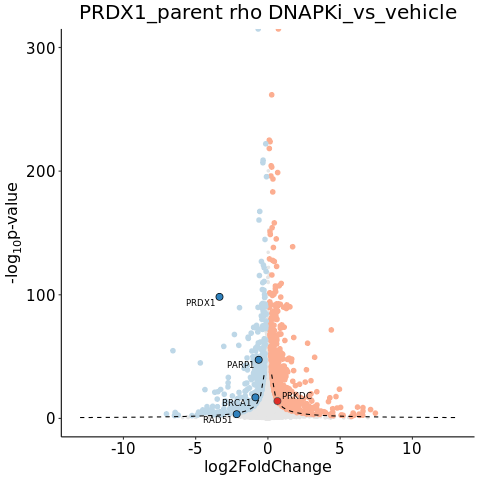

In [124]:
%%R -i df,screen_name
plot_volcano(df, ylim=300,threshold=50) %>% 
    label_resistance_hit(df %>% filter(gene %in% c(
        "PRKDC"
    ))) -> p

p %>% label_sensitivity_hit(df %>% filter(gene %in% c(
        "PRDX1", 
        "RAD51", 
        "PARP1", "BRCA1"
    ))) +
    ggtitle(screen_name) +
    theme(axis.text.x = element_text(size = 15, color = 'black'),
          axis.text.y = element_text(size = 15, color = 'black'),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          legend.title = element_blank(),
          plot.title = element_text(size = 20,hjust = 0.5),
          legend.text = element_text(size = rel(1.5), color = 'black'),
          legend.position = 'right'
         )

In [93]:
df.groupby("label").size()

label
sensitivity_hit      374
resistance_hit       616
gene_non_hit       19081
non-targeting       1026
dtype: int64

#### PRDX1_KO rho DNAPKi_vs_vehicle

In [22]:
screen_name = 'PRDX1_KO rho DNAPKi_vs_vehicle'

In [29]:
df = ann_score_df(data[screen_name][['target','log2FoldChange','padj']])

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro-deseq2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
# df[
#     (df.label.eq('sensitivity_hit')) 
#     # &
#     # (df.gene.str.contains('DNMT'))
# ].gene.to_list()

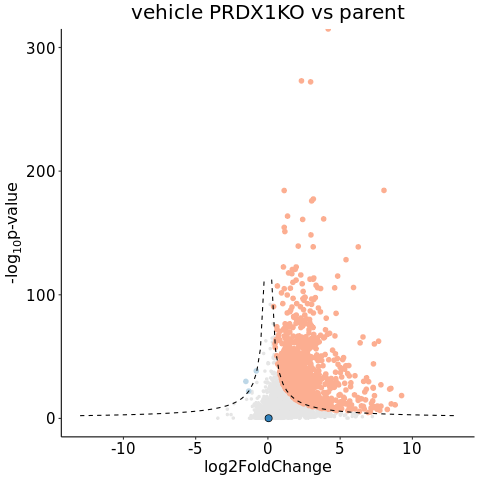

In [31]:
%%R -i df,screen_name
plot_volcano(df) %>% 
    label_sensitivity_hit(df %>% filter(gene %in% c('PRDX1'))) +
    # label_resistance_hit(df %>% filter(gene =='PARP1')) +
    ggtitle('vehicle PRDX1KO vs parent') +
    theme(axis.text.x = element_text(size = 15, color = 'black'),
          axis.text.y = element_text(size = 15, color = 'black'),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          legend.title = element_blank(),
          plot.title = element_text(size = 20,hjust = 0.5),
          legend.text = element_text(size = rel(1.5), color = 'black'),
          legend.position = 'right'
         )

In [14]:
df.groupby("label").size()

label
sensitivity_hit        3
resistance_hit      1128
gene_non_hit       18940
non-targeting       1026
dtype: int64

#### rho vehicle_PRDX1KO_vs_vehicle_parent

In [100]:
screen_name = 'rho vehicle_PRDX1KO_vs_vehicle_parent'

In [101]:
df = ann_score_df(data[screen_name][['target','log2FoldChange','padj']])

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro-deseq2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [121]:
df[
    # (df.label.eq('sensitivity_hit')) 
    (df.label.eq('resistance_hit')) 
    &
    (df.gene.str.contains('PRD'))
].gene.to_list()

['OPRD1', 'PRDM5', 'PRDX4', 'PRDX5', 'RPRD1A']

In [119]:
%%R 
label_black <- function(p,dd, size = 3, t_x = 0.5, t_y = 0.5){
    p + geom_point(
        data = dd, 
        size = size, shape=21,
        # stroke=0.5, 
        # colour = "grey30", 
        fill = "grey30"
    ) + 
    geom_text_repel(data = dd,
                    aes(label=gene),
                    color = 'black', size = size, nudge_x = t_x, nudge_y = t_y)
}

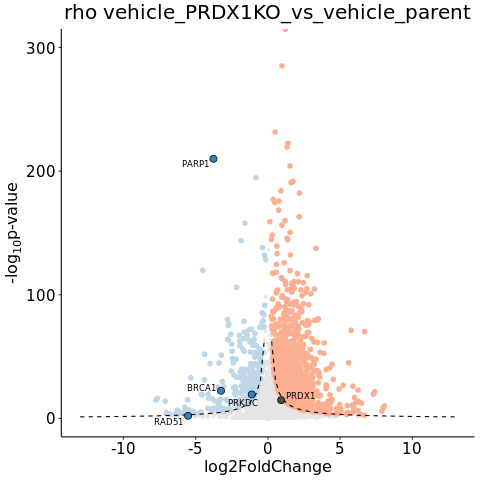

In [120]:
%%R -i df,screen_name
plot_volcano(df, ylim=300,threshold=50) %>% 
    label_black(df %>% filter(gene %in% c('PRDX1'))) -> p

p %>%
    label_sensitivity_hit(df %>% filter(gene %in% c(
        # "PRDX1", 
        "PRKDC", 
        "RAD51", 
        "PARP1", 
        "BRCA1"
    ))) +
    ggtitle(screen_name) +
    theme(axis.text.x = element_text(size = 15, color = 'black'),
          axis.text.y = element_text(size = 15, color = 'black'),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          legend.title = element_blank(),
          plot.title = element_text(size = 20,hjust = 0.5),
          legend.text = element_text(size = rel(1.5), color = 'black'),
          legend.position = 'right'
         )

In [ ]:
df.groupby("label").size()

label
sensitivity_hit      134
resistance_hit       871
gene_non_hit       19066
non-targeting       1026
dtype: int64

# 

In [98]:
!date

Thu May 11 16:54:09 PDT 2023
